## Data Visualization.

### To ignore warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')


### Importing packages.

In [2]:
# Importing libraries we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### To read the csv file

In [3]:
insu= pd.read_csv('Insurance.csv')

In [4]:
insu=insu.dropna()
insu

,member_name,email,gender,location,employer,relationship,patient_name,patient_suffix,patient_dob,cause,Fee_Charged,membership_period,number_of_claims,number_of_dependants,label
0,Chipi,ajimmison0@sun.com,female,Kwekwe,Vipe,Grandfather,Mabhena,789,09-11-1997,Other,3798,1541,2,4,0
1,Femba,rsoonhouse1@google.it,female,Marondera,Mudo,Husband,Sithole,860,1/14/1992,Other,48905,8269,4,3,0
2,Geta,bchecchetelli2@house.gov,female,Rusape,Skaboo,Mother,Chipi,374,07-03-1999,Road Traffic Accident,39963,6223,2,2,0
3,Tichaona,mgarman3@psu.edu,female,Rusape,Babbleset,Father,Jembwa,729,7/31/1978,Road Traffic Accident,34948,8832,6,3,0
4,Chisa,ccough4@biglobe.ne.jp,female,Bulawayo,Flipopia,Father,Foto,716,12/28/1992,Accident At Work,46984,8804,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11237,Gute,bantonutti3m@google.com,male,Harare,Dynabox,Uncle,Chisa Chisi,874,09-12-1979,Accident At Home,16116,370,1,3,1
11238,Moyo,ewhatfordk3@state.tx.us,male,Bindura,Realfire,Grandmother,Gura,451,9/29/2003,Accident At Work,23637,639,4,2,1
11239,Mirwa,bdecroixll@wsj.com,male,Nyanga,Kwimbee,Father,Evans,637,01-05-1975,Accident At Home,42352,8621,4,2,1
11240,Samvura,mrunchman24@hostgator.com,male,Bindura,Janyx,Sister,Bima,799,4/13/1978,Accident At Work,29567,3485,1,4,1


In [5]:
insu = insu.drop_duplicates()

In [6]:
insu.shape

(7000, 15)

### Bar Graph on causes for total number of Insurance claims

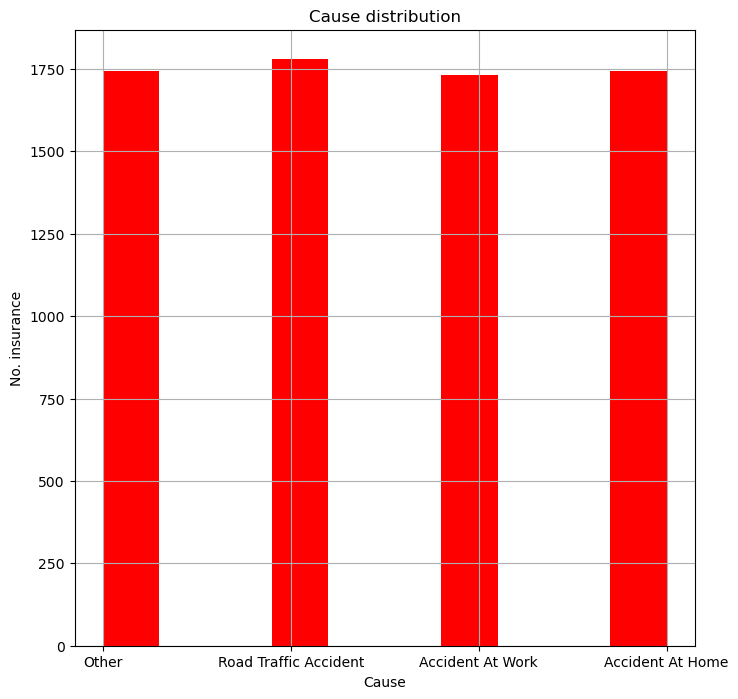

In [7]:
insu["cause"].hist(figsize=(8,8), color = 'red')
plt.title("Cause distribution")
plt.xlabel('Cause')
plt.ylabel("No. insurance")
plt.show()

### Drawing a PieChart on causes for claiming.

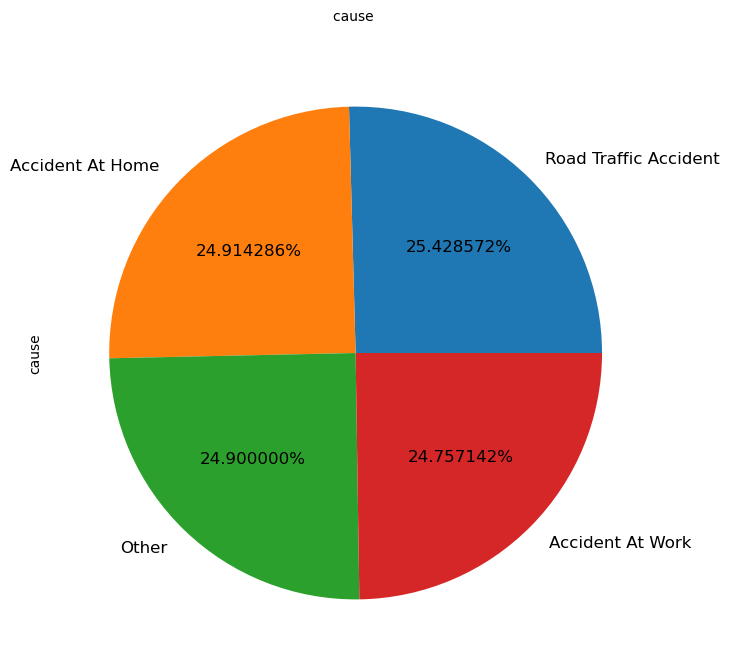

In [8]:
def Contract(df, variable):
    dataframe_pie = insu[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(8,8), autopct='%3f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 10)

Contract(insu, 'cause')

### Bar graph on number of people insurance claimed times by a employer based on gender.

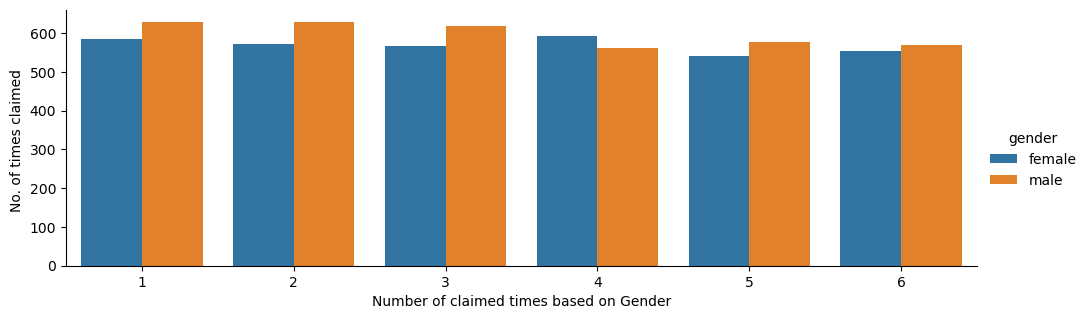

In [9]:
k=sns.factorplot('number_of_claims',data=insu, aspect=2,kind='count',hue='gender')
k.set_ylabels('No. of times claimed ')
k.set_xlabels('Number of claimed times based on Gender')
k.fig.set_figheight(3)

### Bar graph between number of claims on respective causes based on gender

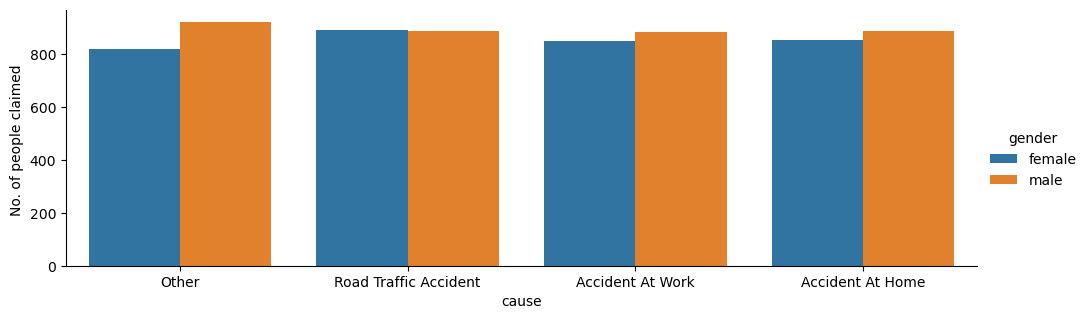

In [10]:
k=sns.factorplot('cause',data=insu, aspect=2,kind='count',hue='gender')
k.set_ylabels('No. of people claimed ')
k.fig.set_figheight(3)

### Scatter Plot between Fees charged and the employer membership period.

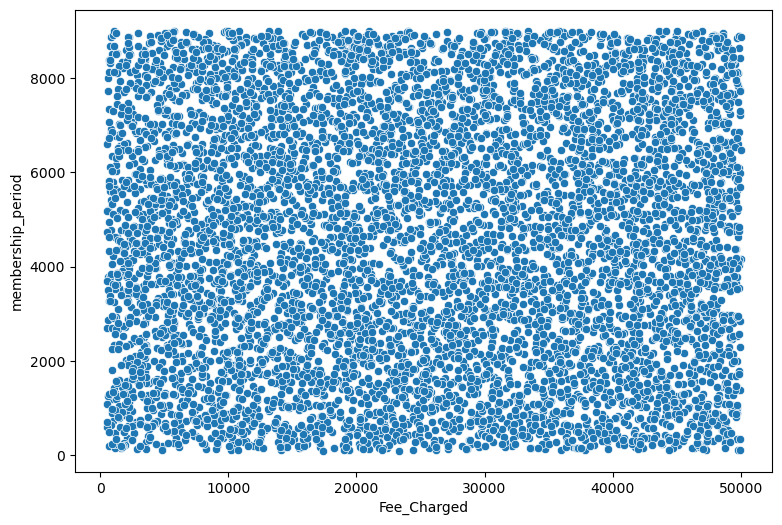

In [11]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=insu['Fee_Charged'],y=insu["membership_period"])
plt.show()

### Bar graph on number of people Insurance claimed and with their results 

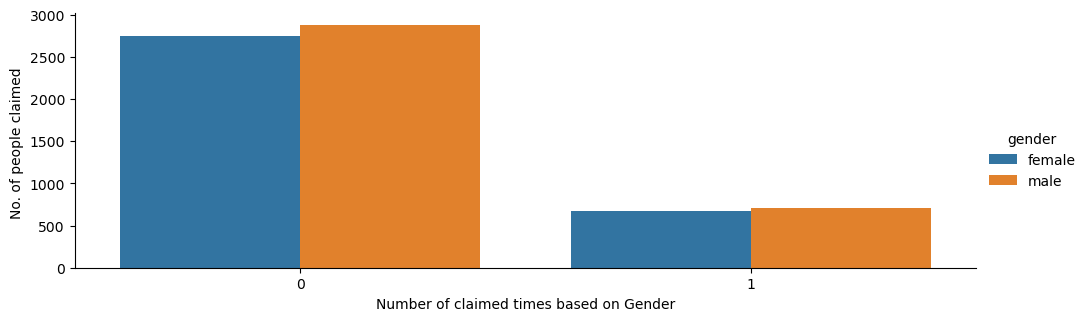

In [12]:
k=sns.factorplot('label',data=insu, aspect=2,kind='count',hue='gender')
k.set_ylabels('No. of people claimed ')
k.set_xlabels('Number of claimed times based on Gender')
k.fig.set_figheight(3)

### We are converting this data to numeric because of Heat Map Plot

In [13]:
print(insu['cause'].unique())
print(insu['gender'].unique())

['Other' 'Road Traffic Accident' 'Accident At Work' 'Accident At Home']
['female' 'male']


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['gender','cause']

for i in var:
    insu[i] = le.fit_transform(insu[i]).astype(int)

In [15]:
print(insu['cause'].unique())
print(insu['gender'].unique())

[2 3 1 0]
[0 1]


### Heat Map plot between Features.

<Axes: >

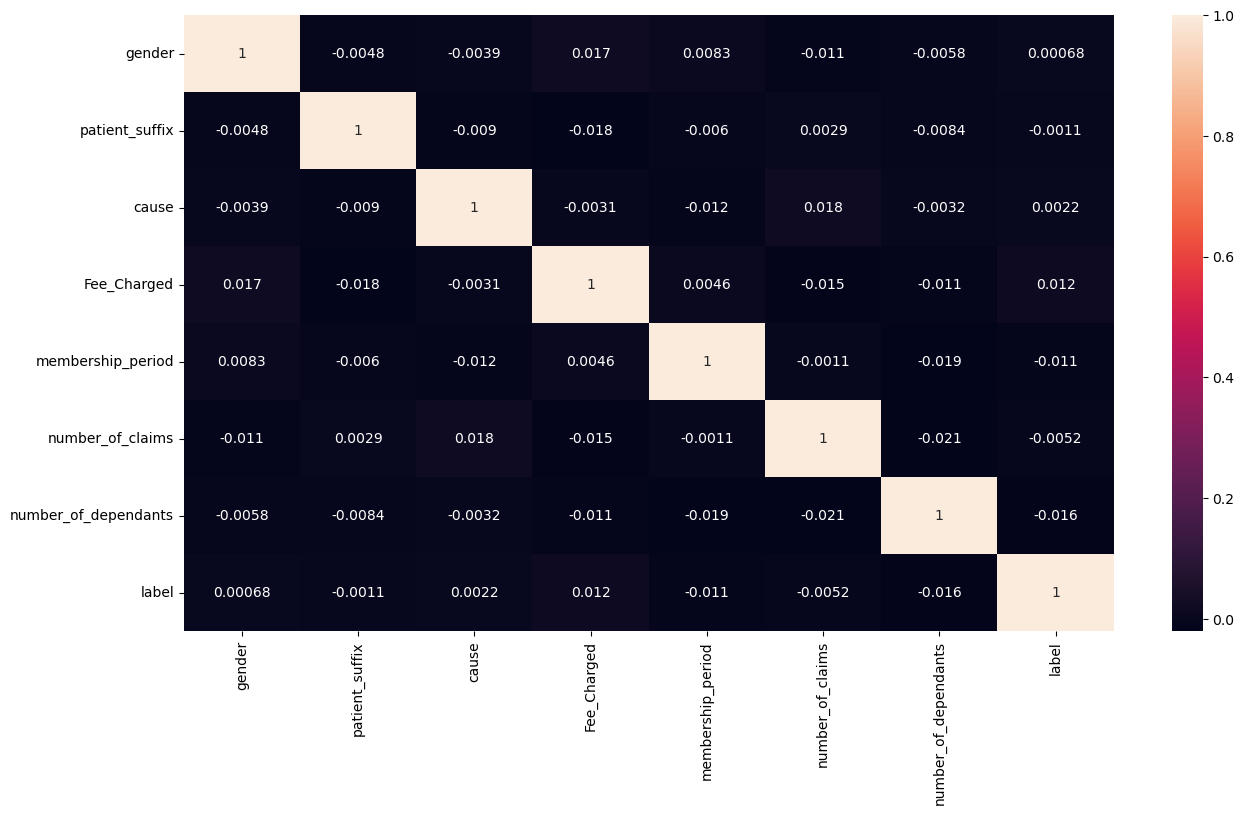

In [16]:
# Heatmap plot diagram
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(insu.corr(), ax=ax, annot=True)